# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [102]:
#read the json in as a DataFrame
df = pd.read_json('data/world_bank_projects.json')

**Find the 10 countries with most projects**

In [105]:
#group projects by how many each country has, then sort high to low
byCountry = df.groupby('countryname').size().sort_values(ascending=False).head(10)
byCountry

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
dtype: int64

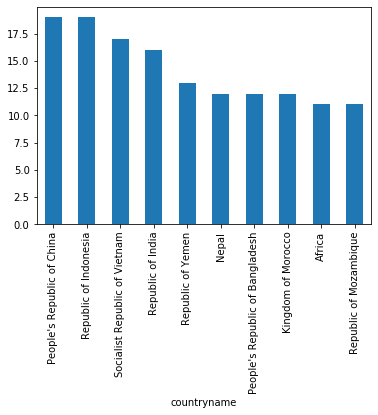

In [119]:
byCountry.plot(kind='bar')

**Find the top 10 major project themes**

In [109]:
#as the needed data is in a nested json, use normalization
data = json.load((open('data/world_bank_projects.json')))
df2 = json_normalize(data, 'mjtheme_namecode')
##group projects by how many there are for each code, then sort high to low
df2.groupby('code').size().sort_values(ascending=False).head(10)

code
11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
dtype: int64

**Create a dataframe with the missing names filled in.**

In [113]:
#drop duplicate rows from data frame, then filter out rows where the name is missing
df3 = df2.drop_duplicates()
df3 = df3[df3.name != '']
#set the codes as the index, then convert to dictionary; get a dict with code and name as key-value pairs
df3.set_index('code', inplace=True)
names = df3['name'].to_dict()


In [114]:
#create a new columns in original data frame that maps values in dict, then delete column with missing names
df2['all_names'] = df2['code'].map(names)
del df2['name']
df2

,code,all_names
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
...,...,...
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration


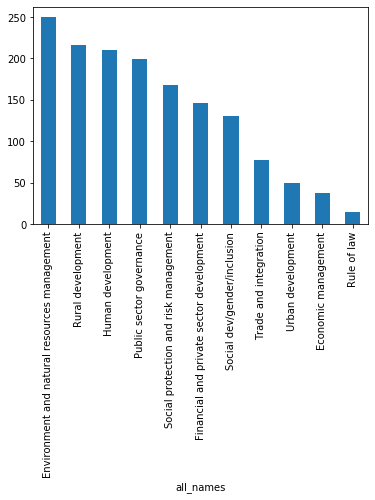

In [126]:
#bar plot of total number of projects by theme, from highest to lowest
df2.groupby('all_names').size().sort_values(ascending=False).plot(kind='bar')